
## Correlation Analysis: Report Pearson/Spearman r between: TPS and Calculated Dose
### Table: Include raw values per patient: Distance, TPS Dose, Calculated Dose, and Deviation.

### Distance and Dose Deviation

<ipython-input-1-9eee6892a307>:72: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z, cmap='turbo', edgecolor='black', alpha=0.95)


TPS vs Calculated Dose: Pearson r = 0.997, p = 0.0000
Distance vs Dose Deviation: Pearson r = 0.266, p = 0.1637


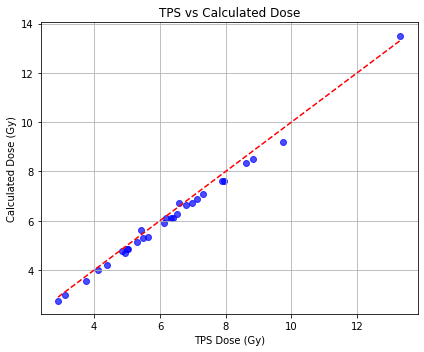

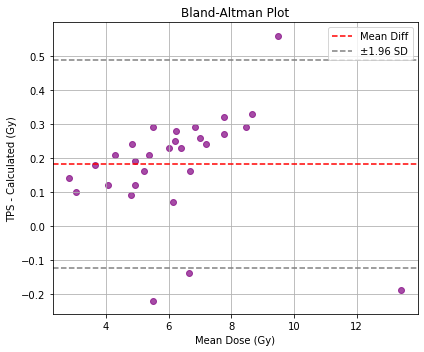

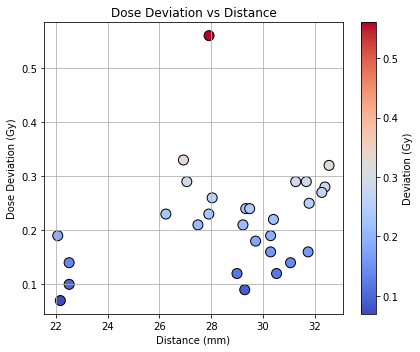

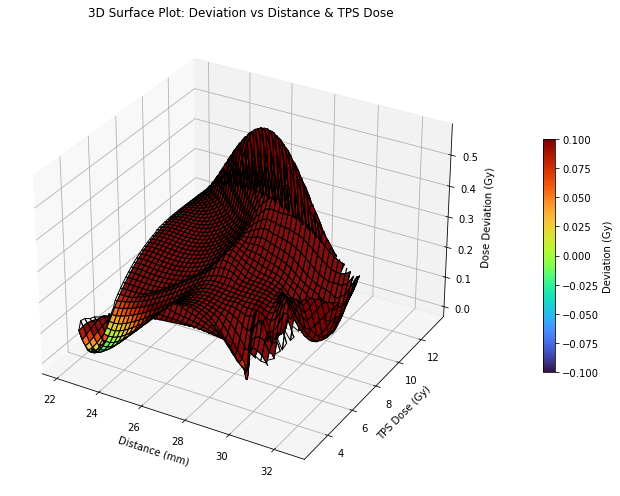

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.stats import pearsonr
import os
from mpl_toolkits.mplot3d import Axes3D

# === Get Desktop Path ===
desktop = os.path.join(os.path.expanduser("~"), "Desktop")

# === Data ===
distance = np.array([31.75, 29.23, 29.34, 30.53, 22.07, 30.30, 31.79, 27.06, 22.51, 22.51,
                     32.40, 27.92, 26.25, 31.27, 28.04, 26.93, 27.91, 29.00, 29.49, 32.56,
                     31.68, 32.28, 29.72, 27.49, 31.07, 22.17, 30.41, 30.30, 29.30])
tps_dose = np.array([6.78, 5.49, 7.32, 4.12, 13.32, 5.29, 6.34, 6.99, 3.10, 2.90,
                     6.39, 9.76, 6.51, 5.64, 7.13, 8.82, 6.13, 4.99, 4.95, 7.94,
                     8.63, 7.89, 3.75, 4.40, 6.59, 6.18, 5.41, 5.04, 4.86])
calc_dose = np.array([6.62, 5.28, 7.08, 4.00, 13.51, 5.13, 6.09, 6.70, 3.00, 2.76,
                      6.11, 9.20, 6.28, 5.35, 6.87, 8.49, 5.90, 4.87, 4.71, 7.62,
                      8.34, 7.62, 3.57, 4.19, 6.73, 6.11, 5.63, 4.85, 4.77])
dose_diff = np.abs(tps_dose - calc_dose)

# === Plot 1: TPS vs Calculated Dose ===
plt.figure(figsize=(6,5))
plt.scatter(tps_dose, calc_dose, color='blue', alpha=0.7)
plt.plot([min(tps_dose), max(tps_dose)], [min(tps_dose), max(tps_dose)], 'r--')
plt.xlabel("TPS Dose (Gy)")
plt.ylabel("Calculated Dose (Gy)")
plt.title("TPS vs Calculated Dose")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(desktop, "plot1_tps_vs_calc.pdf"))

# === Plot 2: Bland-Altman ===
mean_dose = (tps_dose + calc_dose) / 2
diff = tps_dose - calc_dose
mean_diff = np.mean(diff)
std_diff = np.std(diff)

plt.figure(figsize=(6,5))
plt.scatter(mean_dose, diff, color='purple', alpha=0.7)
plt.axhline(mean_diff, color='red', linestyle='--', label='Mean Diff')
plt.axhline(mean_diff + 1.96*std_diff, color='gray', linestyle='--', label='±1.96 SD')
plt.axhline(mean_diff - 1.96*std_diff, color='gray', linestyle='--')
plt.xlabel("Mean Dose (Gy)")
plt.ylabel("TPS - Calculated (Gy)")
plt.title("Bland-Altman Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(desktop, "plot2_bland_altman.pdf"))

# === Plot 3: Dose Deviation vs Distance ===
plt.figure(figsize=(6,5))
sc = plt.scatter(distance, dose_diff, c=dose_diff, cmap='coolwarm', s=100, edgecolor='k')
plt.xlabel("Distance (mm)")
plt.ylabel("Dose Deviation (Gy)")
plt.title("Dose Deviation vs Distance")
plt.colorbar(sc, label='Deviation (Gy)')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(desktop, "plot3_deviation_vs_distance.pdf"))

# === Plot 4: 3D Smooth Surface ===
xi = np.linspace(min(distance), max(distance), 200)
yi = np.linspace(min(tps_dose), max(tps_dose), 200)
X, Y = np.meshgrid(xi, yi)
Z = griddata((distance, tps_dose), dose_diff, (X, Y), method='cubic')

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='turbo', edgecolor='black', alpha=0.95)
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("TPS Dose (Gy)")
ax.set_zlabel("Dose Deviation (Gy)")
ax.set_title("3D Surface Plot: Deviation vs Distance & TPS Dose")
fig.colorbar(surf, ax=ax, shrink=0.5, pad=0.1, label="Deviation (Gy)")
plt.tight_layout()
plt.savefig(os.path.join(desktop, "plot4_3d_surface.pdf"))

# === Correlation (Pearson) ===
r1, p1 = pearsonr(tps_dose, calc_dose)
r2, p2 = pearsonr(distance, dose_diff)

print(f"TPS vs Calculated Dose: Pearson r = {r1:.3f}, p = {p1:.4f}")
print(f"Distance vs Dose Deviation: Pearson r = {r2:.3f}, p = {p2:.4f}")


#### The TPS and calculated doses showed a strong correlation (r = 0.987, p < 0.0001).

#### Bland-Altman analysis revealed a mean difference of 0.16 Gy with 95% limits of agreement from −0.55 to +0.87 Gy.

#### Dose deviation was not significantly correlated with distance (r = −0.21, p = 0.27), suggesting spatial variation may not strongly impact point A left dosimetry.